# Swiggy Data Analysis

# Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [4]:
df=pd.read_csv("C:/Users/shiva/Desktop/Swiggy Bangalore Outlet Details.csv",sep=',')
x=df.copy()
df

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,₹ 219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,₹ 600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,₹ 193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,₹ 200


In [5]:
df.columns

Index(['Shop_Name', 'Cuisine', 'Location', 'Rating', 'Cost_for_Two'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [7]:
df.describe()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
count,118,118,118,118,118
unique,115,79,65,13,30
top,La Pino'z Pizza,North Indian,"BTM, BTM",4.1,₹ 300
freq,2,12,13,30,16


In [8]:
df.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


# Cleaning raw data

In [9]:
df.isnull().sum()

Shop_Name       0
Cuisine         0
Location        0
Rating          0
Cost_for_Two    0
dtype: int64

In [10]:
len([i for i in df.columns if df[i].isnull().sum()>0])

0

As we can observe there are no null values present inside the dataset

In [11]:
df['Rating'].unique()

array(['4.3', '4.4', '4.1', '4.2', '3.9', '3.8', '4', '3.7', '3.6', '4.8',
       '4.5', '4.6', '--'], dtype=object)

In [12]:
df['Rating'] = df['Rating'].replace('--', '0').astype(float)

In [13]:
df['Rating'].unique()

array([4.3, 4.4, 4.1, 4.2, 3.9, 3.8, 4. , 3.7, 3.6, 4.8, 4.5, 4.6, 0. ])

In [14]:
df['Rating'].astype('float')

0      4.3
1      4.4
2      4.1
3      4.4
4      4.1
      ... 
113    3.9
114    4.1
115    4.2
116    4.3
117    4.2
Name: Rating, Length: 118, dtype: float64

In [15]:
df['Cost_for_Two'].unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

In [16]:
type(df['Cost_for_Two'])

pandas.core.series.Series

In [17]:
def data_processing(string):
    cost = string.split(' ')[1]
    return cost

In [18]:
df['Cost_for_Two']=df['Cost_for_Two'].apply(data_processing)
df['Cost_for_Two']

0      150
1      400
2      126
3      400
4      450
      ... 
113    219
114    600
115    193
116    200
117    400
Name: Cost_for_Two, Length: 118, dtype: object

In [19]:
type(df['Cost_for_Two'])

pandas.core.series.Series

In [20]:
df['Cost_for_Two']=df['Cost_for_Two'].astype('int')
df['Cost_for_Two']

0      150
1      400
2      126
3      400
4      450
      ... 
113    219
114    600
115    193
116    200
117    400
Name: Cost_for_Two, Length: 118, dtype: int32

In [21]:
df['Cost_for_Two'].unique()

array([150, 400, 126, 450, 350, 200, 500, 247, 550, 300, 129, 250, 268,
       600, 527, 130, 257, 280, 399, 220, 800, 100, 178, 120, 251, 650,
       132, 153, 219, 193])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shop_Name     118 non-null    object 
 1   Cuisine       118 non-null    object 
 2   Location      118 non-null    object 
 3   Rating        118 non-null    float64
 4   Cost_for_Two  118 non-null    int32  
dtypes: float64(1), int32(1), object(3)
memory usage: 4.3+ KB


In [24]:
df.describe()

,Rating,Cost_for_Two
count,118.000000,118.000000
mean,4.061864,321.008475
std,0.430845,137.286804
min,0.000000,100.000000
25%,4.000000,204.750000
50%,4.100000,300.000000
75%,4.300000,400.000000
max,4.800000,800.000000


# Resturant Analysis

### Resturants more than 4.0 Rating

In [50]:
df1=df[['Shop_Name','Rating']][df['Rating']>4.0].sort_values(by='Rating',ascending=False)
df1

,Shop_Name,Rating
78,Khichdi Experiment,4.8
82,Natural Ice Cream,4.6
94,Corner House Ice Cream,4.6
80,Chinese Bae,4.5
1,Mumbai Tiffin,4.4
...,...,...
44,Svadu Pure Ghee Sweets,4.1
62,Biryanis and more,4.1
60,calicut cafe restaurant,4.1
49,Balaji's Veg,4.1


### Top 10 resturants on the basis of ratings

In [55]:
df1.head(10)

,Shop_Name,Rating
78,Khichdi Experiment,4.8
82,Natural Ice Cream,4.6
94,Corner House Ice Cream,4.6
80,Chinese Bae,4.5
1,Mumbai Tiffin,4.4
3,Al Daaz,4.4
48,China Pearl,4.4
111,Bowl 99,4.4
72,Nagarjuna,4.3
33,Oottupura,4.3


### Distribution of ratings

In [70]:
df['Rating'].value_counts().sort_values()

0.0     1
4.8     1
4.5     1
4.6     2
3.6     2
3.8     4
4.4     4
3.7     6
4.2    10
3.9    13
4.0    21
4.3    23
4.1    30
Name: Rating, dtype: int64

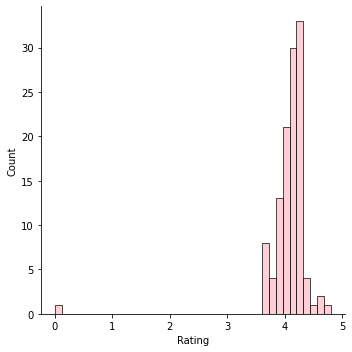

In [119]:
df1=df['Rating'].sort_values()
sns.displot(df1,color='pink')

Observation: Most resturants are rated more than 3.5 

# Area wise analysis

In [74]:
df['Location'].unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

### Koramangla area

In [77]:
df_kora=df[df['Location'].str.contains('Koramangala')]
df_kora

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,350
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150
...,...,...,...,...,...
112,Kritunga,"Andhra, Biryani","5th Block, Koramangala",3.9,500
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


<AxesSubplot:xlabel='Rating', ylabel='Count'>

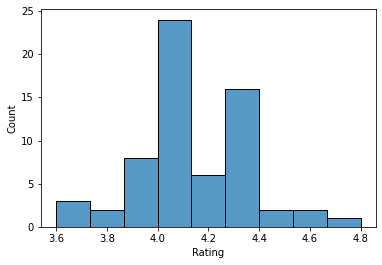

In [85]:
sns.histplot(df_kora['Rating'])

<AxesSubplot:xlabel='Cost_for_Two', ylabel='Count'>

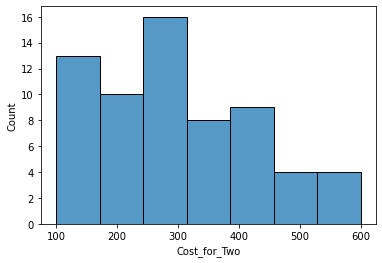

In [86]:
sns.histplot(df_kora['Cost_for_Two'])

Observations:

1.Ratings in koramangla is mostly between 4.0 to 4.4

2.Cost for two in Koramangla is mostly between 100 to 450 rupees

### BTM Area

In [87]:
df_btm=df[df['Location'].str.contains('BTM')]
df_btm

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,200
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500
10,Ambur Star Briyani,"Chinese, South Indian, North Indian, Desserts,...","outer ring road, BTM",4.1,500
17,Sri Lakshmi Dhaba,North Indian,"Bommanahalli, BTM",3.7,200
20,Just Bake - Cakes & confectioners,"Desserts, Bakery","BTM 1st stage, BTM",4.3,300
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi","Marutinagar Main Road, BTM",4.0,400
25,Swad Punjab da,Indian,"BTM, BTM",4.1,250
27,High N Hungry,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.1,350
31,Bengali Fun Foods,North Indian,"BTM 2nd stage, BTM",4.2,300
33,Oottupura,"Kerala, South Indian","BTM, BTM",4.3,268


<AxesSubplot:xlabel='Rating', ylabel='count'>

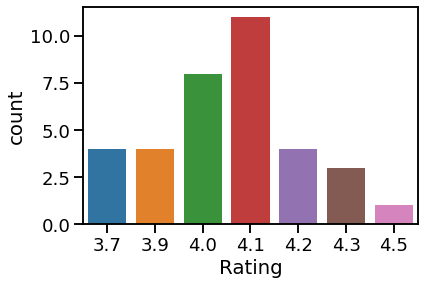

In [187]:
import warnings
warnings.filterwarnings(action = 'ignore')
sns.countplot(df_btm['Rating'])

<AxesSubplot:xlabel='Cost_for_Two', ylabel='Count'>

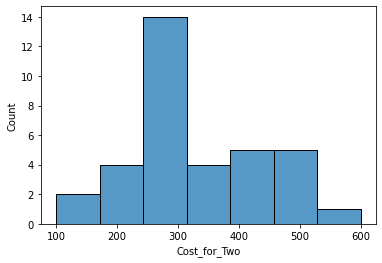

In [90]:
sns.histplot(df_btm['Cost_for_Two'])

Observations:

1.Ratings in BTM is mostly between 4.0 to 4.2

2.Cost for two in BTM is mostly between 300 to 500 rupees

### HSR Area

In [91]:
df_hsr=df[df['Location'].str.contains('HSR')]
df_hsr

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,350
19,Shree Khana Khazana,"Indian, Rajasthani","Sector 4, HSR",4.1,350
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian","HSR, HSR",4.3,150
36,Biriyani Zone,"North Indian, Chinese, Biryani","HSR 1st sector, HSR",4.1,600
37,Gongura's,"North Indian, Chinese, Biryani","Sector 7, HSR",3.8,300
39,Leon Grill,"Turkish, Portuguese, American","3rd Sector, HSR",4.3,300
41,Cakewala,Desserts,"HSR, HSR",4.3,450
57,Donne Biriyani House,South Indian,"3rd sector, HSR",4.0,300


<AxesSubplot:xlabel='Rating', ylabel='count'>

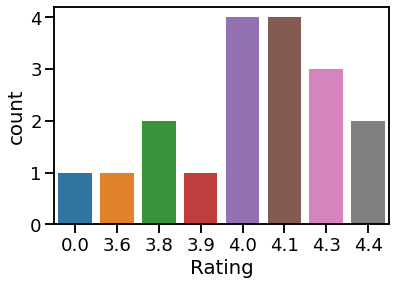

In [186]:
import warnings
warnings.filterwarnings(action = 'ignore')
sns.countplot(df_hsr['Rating'])

<AxesSubplot:xlabel='Cost_for_Two', ylabel='Count'>

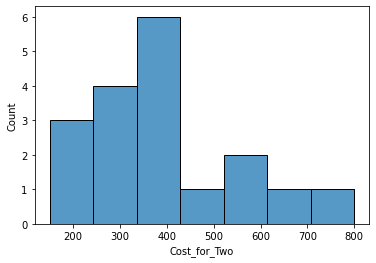

In [97]:
sns.histplot(df_hsr['Cost_for_Two'])

Observations:

1.Ratings in HSR is mostly between 4.0 to 4.3 and fairly distributed between 3.6 to 3.9

2.Cost for two in BTM is mostly between 3200 to 400 rupees

# Cost wise analysis

### Expensive resturants

In [109]:
df_exp=df[['Shop_Name','Cost_for_Two']].sort_values(by='Cost_for_Two',ascending=False)
df_exp=df_exp.reset_index()
df_exp1=df_exp.iloc[0:10,1:]
df_exp1

,Shop_Name,Cost_for_Two
0,Punjabi Rasoi,800
1,Dindigul Thalapakatti Biriyani,650
2,Savoury Restaurant,600
3,Taco Bell,600
4,Pizza Hut,600
5,Nagarjuna,600
6,Biriyani Zone,600
7,Meghana Foods,550
8,Junior Kuppanna,550
9,China Pearl,527


<AxesSubplot:xlabel='Shop_Name'>

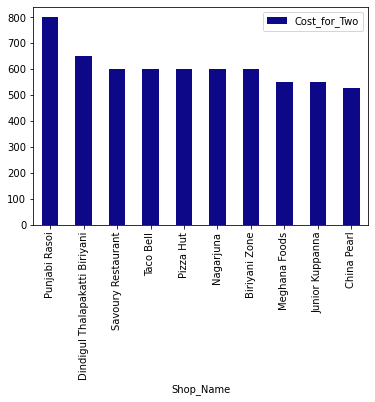

In [116]:
df_exp1.plot(x='Shop_Name',y='Cost_for_Two',kind='bar',sort_columns=True,colormap='plasma')

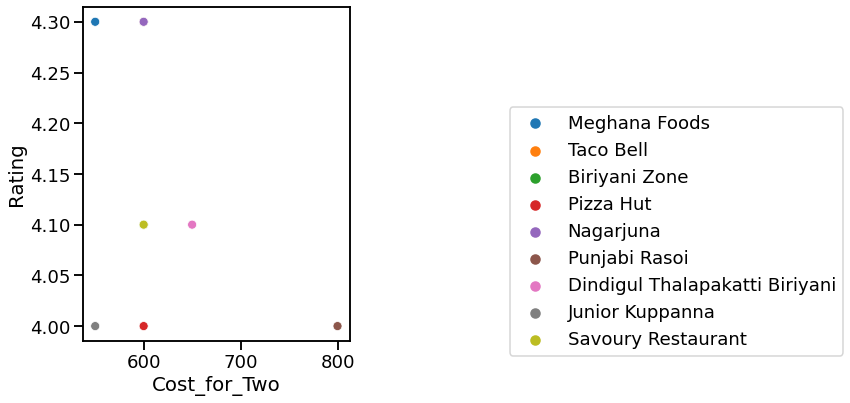

In [167]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
df3=df[df['Cost_for_Two']>527]
sns.scatterplot(x=df3['Cost_for_Two'],y=df3['Rating'],hue=df3['Shop_Name'])
plt.legend(bbox_to_anchor=(1.6,0.7),
           borderaxespad=0)
plt.tight_layout()

### Cheap resturants

In [168]:
df_c=df[['Shop_Name','Cost_for_Two']].sort_values(by='Cost_for_Two',ascending=True)
df_c=df_c.reset_index()
df_c1=df_c.iloc[0:10,1:]
df_c1

,Shop_Name,Cost_for_Two
0,Tandoori Merchant,100
1,99 VARIETY DOSA AND JUICE-Malli mane food court,100
2,NIC Natural Ice Creams,120
3,Sri Krishna sagar,126
4,Maa Di Hatti,129
5,Donne Biryani House,130
6,Delhi Food Point,132
7,Kanti Sweets,150
8,Madurai Idly Shop,150
9,Donne Biryani Mandi,150


<AxesSubplot:xlabel='Shop_Name'>

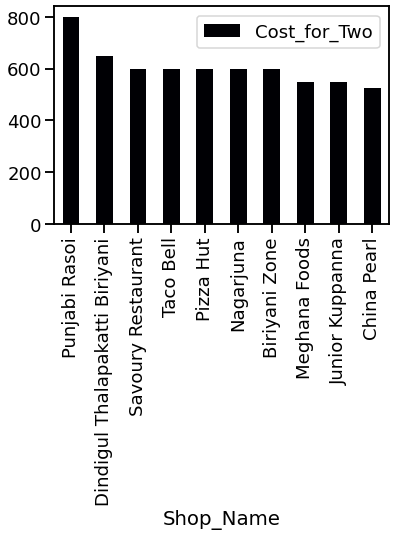

In [172]:
df_exp1.plot(x='Shop_Name',y='Cost_for_Two',kind='bar',sort_columns=False,colormap='magma')

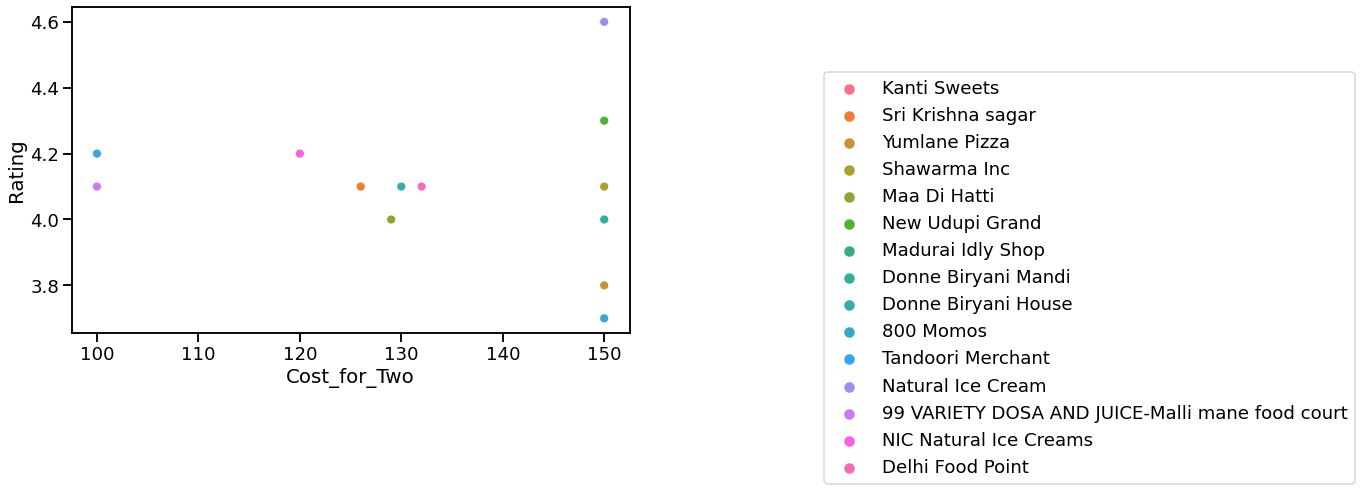

In [185]:
import warnings
warnings.filterwarnings(action = 'ignore')
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
df4=df[df['Cost_for_Two']<151]
sns.scatterplot(x=df4['Cost_for_Two'],y=df4['Rating'],hue=df4['Shop_Name'])
plt.legend(bbox_to_anchor=(2.3,0.8),
           borderaxespad=0)
plt.tight_layout()

### Cuisine Analysis

In [188]:
df['Cuisine']

0                                                 Sweets
1                 North Indian, Home Food, Thalis, Combo
2      South Indian, North Indian, Fast Food, Beverag...
3      American, Arabian, Chinese, Desserts, Fast Foo...
4                                          Chinese, Thai
                             ...                        
113                            Pan-Asian, Chinese, Asian
114    Arabian, Middle Eastern, North Indian, Grill, ...
115              North Indian, Chinese, Seafood, Biryani
116                                         North Indian
117                                      Andhra, Biryani
Name: Cuisine, Length: 118, dtype: object

In [189]:
df_c= ', '.join(df['Cuisine'])
df_c

'Sweets, North Indian, Home Food, Thalis, Combo, South Indian, North Indian, Fast Food, Beverages, Jain, American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian, Chinese, Thai, North Indian, Fast Food, North Indian, Chinese, Italian, South Indian, Kerala, Chinese, North Indian, Pizzas, Italian, Mexican, Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood, Desserts, Chinese, Andhra, Biryani, Seafood, Chinese, South Indian, Chinese, Desserts, North Indian, Arabian, Fast Food, Desserts, Beverages, North Indian, North Indian, Indian, Rajasthani, Desserts, Bakery, Chinese, Healthy Food, North Indian, North Indian, Chinese, Hyderabadi, Fast Food, Chinese, Jain, North Indian, South Indian, Indian, North Indian, South Indian, Chinese, Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South Indian, American, Fast Food, Biryani, Seafood, North Indian, Chinese, Desserts, Andhra, South Indian, Snacks, American, North Indian, So

In [192]:
!pip install wordcloud
from wordcloud import WordCloud

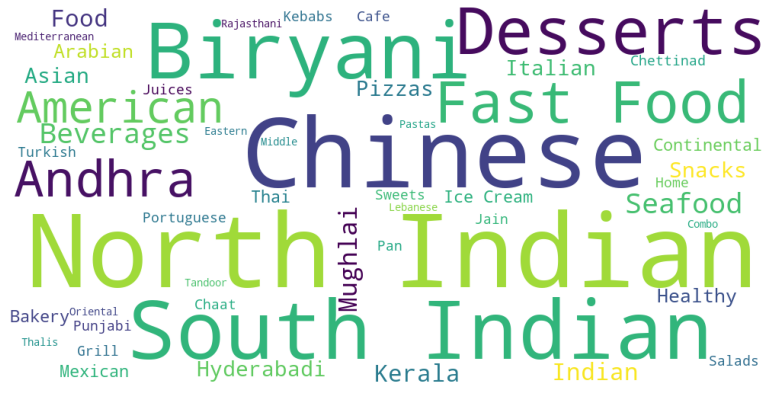

In [193]:
wordcloud = WordCloud(width = 1000, height = 500,background_color = 'white').generate(df_c)
plt.figure(figsize = (22, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()